In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
%matplotlib inline


In [2]:
df = pd.read_excel("Topics_stars10000_project_keyword.xlsx") #star>10000개가 있는 Df
# df = pd.read_excel("Topics_keywords.xlsx")   # vehicle Data가 들은 Df
df.drop_duplicates(['project_name'])
df.head(50)

,project_name,topic_keyword
0,freeCodeCamp/freeCodeCamp,"['react', 'nodejs', 'javascript', 'd3', 'teach..."
1,996icu/996.ICU,[]
2,EbookFoundation/free-programming-books,"['education', 'list', 'books', 'resource', 'ha..."
3,jwasham/coding-interview-university,"['computer-science', 'algorithm', 'algorithms'..."
4,vuejs/vue,"['javascript', 'framework', 'vue', 'frontend']"
5,facebook/react,"['react', 'javascript', 'library', 'ui', 'fron..."
6,kamranahmedse/developer-roadmap,"['computer-science', 'engineering', 'roadmap',..."
7,sindresorhus/awesome,"['lists', 'awesome', 'unicorns', 'resources', ..."
8,tensorflow/tensorflow,"['python', 'machine-learning', 'deep-neural-ne..."
9,twbs/bootstrap,"['javascript', 'css', 'html', 'sass', 'bootstr..."


In [3]:
# 비슷한 토픽끼리는 하나의 칼럼이 될 수 있도록 일일히 비슷한 토픽끼리 묶는 작업을 하였음
target = ['machinelearning','package','zsh','zerossl','youtube','xcode','x64','wysiwyg','workflow','windows','weixin','wechat','web','vue',
         'vpn','vision','vim','vedio','version','util','ui','typescript','twitter','touch','test','terminal','tensorflow',
         'telegram','task','system','swift','swagger','svg','style','static','state','ssh','sql','spring','sort','software',
         'snippets','server','security','search','scikit-learn','rfc','rest','redis','react','queue','pytorch','python','protoc','progress',
         'programming','posix','php','performance','openwrt','note','nodejs','neural','nlp','monitoring','microservice','material','macos','linux',
          'leetcode','language','kotlin','json','javascript','ios','interview','http','html','headless','graphql','git','frontend','font','flutter',
          'firefox','file','face-swap','docker','distributed','design','deep-learning','data','css','cloud','chrome','automation','api','angular',
          'android','algorithm','pull-request', 'public','pixi','open-source','object-detection','multi-platform','mini','low-code','localstorage','loading',
          'kubernetes','koa','image','humans','game','free','detection','drag','document','devops','dashboard','crypto','cpp','continuous-delivery','command','cheatsheet',
          'certificate','business','build','bootstrap','awesome','audio','apple','apache','ansi','animation','alibaba','admin','activejob'
         ]



string_list = [['machinelearning-python','ml','machine-translation','machine-learning-from-scratch','machine-learning-algorithms','machine-learning'],['packages','package-manager','packaging'],['zsh-theme','zsh-prompt','zsh-configuration','zsh-autosuggestions'],['zero-copy','zero-configuration'],['youtube-live'],['xcode10'],['x86-64','x86'],['wysiwyg-editor'],
               ['workflow-automation','works-with-clojurescript','works-with-codespaces','works-with-construct','works-with-elm','works-with-flutter','works-with-gatsby','works-with-mint','works-with-phaser','works-with-react','works-with-reason','works-with-svelte','works-with-vue','works-with-yew'],
               ['windowing','windows-10','windows-console','windows-terminal','windowscontainers'],['weixin-plugin'],['wechat-macos','wechat-mini-program','wechat-plugin','wechat-weapp'],
               ['webxr','webworkers','webview','webtorrent','webstorm','websql','websockets','websocket-server','websocket-compression','websocket-client','websocket','website','webservices','webscraping','webrtc','webpack5','webpack4','webpack2','webpack','webp','webm','webgpu','webgl2','webgl','webframework','webfont','webfinger','webdriver','webdevelopment','webdav','webcomponents','webbrowser','webaudio','webassembly','webapp','webapi','web-terminal','web-server','web-performance','web-framework','web-development','web-components','web-clipper','web-audio','web-application-framework','web-application','web-app','web','sdwebimage','react-native-web','node-webkit','mobile-web','ipfs-web'],
               ['vuex','vuetifyjs','vuetify','vuepress','vuejs3','vuejs2','vuejs','vue3','vue2','vue-router','vue-material','vue-components','vue-component','vue-cli','vue-admin','ant-design-vue'],
               ['vpn-server','vpn-client'],['visual-studio','visualizer','visualizations','visualization','visual-studio-code-theme','visual-studio-code-extension','visual-studio-code','visual-studio','data-visualization'],
               ['vimrc','vimeo','vim-plugins','vim-plugin','vim-distribution','vim-configuration','vim'],['videojs','videocache','video-recording','video-player','video-conferencing','video-communication','video','scalable-video-conferences','html5-video','explanatory-math-videos','deep-video','3b1b-videos'],
               ['versioning','version-manager'],['utils','utility-classes','utilities'],['ui-library','ui-kit','ui-design','ui-components','redis-gui-client','gui-framework','gui-app'],
               ['typescript-playground','typescript-framework','typescript-definitions','typescript'],['twitter-streaming','twitter-cards','twitter','tweet'],
               ['touchscreen','touch-events','touch'],['unit-testing','tests','testing-tools','testing','test-suite','test-runners','test-runner','test-framework','test-automation','performance-testing','pentesting-windows','pentesting','pentesters','pentest','penetration-testing','painless-javascript-testing','load-testing','javascript-tests','interview-test','end-to-end-testing','e2e-tests','e2e-testing','api-testing','api-test'],
               ['windows-terminal','web-terminal','terminals','terminal-themes','terminal-schemes','terminal-emulators','terminal-color','terminal','osx-terminal-themes','lxterminal'],
               ['tensorflow-lite','tensorflow','tensor'],['telegram-solution','telegram-desktop'],['task-scheduler','task-runner','task-manager'],
               ['systems-science','systems','system-design','system','recommendedsystem','operating-system','management-system','fuse-filesystem','filesystem','embedded-systems','distributed-systems','design-systems','design-system','database-systems','content-management-system','build-system'],
               ['swiftyjson','swiftui','swiftpm','swift4-2','swift-programming','swift-package-manager','swift-library','swift-language','swift-framework','swift-extensions','swift','server-side-swift','rxswift','reactiveswift','openstack-swift','json-parsing-swift','ios-swift','awesome-swift','apple-swift'],
               ['swagger2','swagger-ui','swagger-js','swagger-api'],['svgo','svg-sprites','svg-path','svg-icons'],['stylesheets','stylesheet-language','styleguide','styled-components','style-linter','style-guide'],
               ['static-site-generator','static-code-analysis','static-analysis'],['statechart','state-tree','state-management','state-machine'],
               ['ssh-tunnel','ssh-server','ssh-agent'],['websql','sqlserver','sqlmap','sqlite','sql-server','sql-injection','sql-editor','sql','spark-sql','postgresql','nosql','mysql-compatibility','mysql','mssql','microsoft-sql-server'],
               ['springs','springmvc','springcloud-config','springcloud','springbootadmin','springboot-shiro','springboot','spring-session','spring-security','spring-physics','spring-framework','spring-data-jpa','spring-cloud-core','spring-cloud-alibaba','spring-cloud','spring-cache','spring-boot-upload-file','spring-boot-mongodb','spring-boot-mail','spring-boot-learning','spring-boot-examples','spring-boot-demo','spring-boot-2','spring-boot','spring','react-spring'],
               ['sorts','sorting-algorithms','sortable'],['software-engineering','software-engineer','software-development','software-analysis'],
               ['snippets-library','snippets-collection','snippets'],['websocket-server','web-server','vpn-server','ssh-server','sqlserver','sql-server','serverless-functions','serverless-framework','serverless-architectures','serverless','server-side-swift','server-side-rendering','server-rendering','server','parse-server','observer','microsoft-sql-server','jumpserver','http-server','graphql-server','dns-server','dhcp-server','dev-server','api-server'],
               ['spring-security','security-researchers','security-checklist','security-book','security','macos-security','macbook-security','docker-security','application-security'],
               ['site-search','silver-searcher','security-researchers','searches','search-in-text','search-engines','search-engine','search','research','jobsearch','jobs-search','hyperparameter-search','entreprise-search','elasticsearch','distributed-search-engine'],
               ['scikit-learn-python','scikit-learn'],['rfc-8259','rfc-7159','rfc-7049','rfc-6902','rfc-6901','rfc-6455'],['restful-api','restful','rest-api','rest','postgrest','api-rest','admin-on-rest'],
               ['redis-gui-client','redis-gui','redis-cluster','redis-client'],['works-with-react','reactjs','reactivex','reactiveui','reactiveswift','reactivecocoa','reactive-streams','reactive-programming','reactive','react16','react-tutorial','react-spring','react-router','react-navigation','react-native-web','react-native','react-interview-questions','react-hooks','react-components','react-component','react-boilerplate','react-apps','react-admin'],
               ['sqs-queue','queued-jobs','queue-workers','queue-tasks','queue','message-queue'],['pytorch-tutorial','pytorch-transformers'],['scikit-learn-python','python3','python-types','python-resources','python-requests','python-library','python-interview-questions','python-framework','python-cheatsheet','python-3','python','progress-bar-python'],
               ['protocol-compiler','protocol-buffers','protocol','protoc','ipfs-protocol','homekit-accessory-protocol','acme-protocol'],['progressmeter','progressbar','progress-bar-python','progress-bar'],['swift-programming','reactive-programming','programming-tutorial','programming-ligatures','programming-language','programming-interviews','programming-blogs','programming','programmer','javascript-programming','functional-programming','dynamic-programming-algorithm','dynamic-programming','concurrent-programming','competitive-programming'],
               ['posix-sh','posix-compliant-flags','posix-compliant'],['phpunit','phpstorm','phpmailer','php8','php7','php-library','php-installation','php-framework','php-applications','php','modern-php','designpatternsphp'],
               ['web-performance','performance-testing','performance-metrics','performance-analysis','performance','high-performance','best-performance'],
               ['openwrt-zh-cn','openwrt-shadowsocksr-libev-full','openwrt-package','openwrt-feed'],['notes','notebooks','notebook','note','jupyter-notebook','evernote'],['nodemon','nodejs-framework','nodejs-development','nodejs','node-webkit','node-module','node-js','node-framework','node'],
               ['neural-networks','neural-network','neural-nets','deep-neural-networks'],['natural-language-understanding','natural-language-processing','natural-language-generation','nlp-tasks','nlp-library'],['monitoring','monitor','error-monitoring','docker-monitoring'],
               ['polyglot-microservices','microservices-architecture','microservices'],['vue-material','training-materials','material-ui','material-theme','material-design-lite','material-design-for-bootstrap','material-design','material-components','material','bootstrap-material','angularjs-material'],
               ['wechat-macos','macosx','macos-setup','macos-security','macos-application'],['ubuntu-linux','linux-resource','linux-kernel','linux-insides','linux-desktop','linux-command','linux-app'],
               ['leetcode-solutions','leetcode-questions','leetcode-java','leetcode-golang','leetcode-go','leetcode-c'],['swift-language','stylesheet-language','ruby-language','programming-language','natural-language-understanding','natural-language-processing','natural-language-generation','multi-language','language-models','language-model','language-grammars','language-client','language','julia-language','esoteric-language'],
               ['kotlin-library','kotlin-android'],['ubjson','swiftyjson','json-serializer','json-serialization','json-schema','json-pointer','json-patch','json-parsing-swift','json-parsing-library','json-parser','json-merge-patch','json-diff','json','fastjson'],['painless-javascript-testing','javascript-tests','javascript-programming','javascript-motion-engine','javascript-modules','javascript-library','javascript-interview-questions','javascript-framework','javascript-engines','javascript-engine','javascript-compiler','javascript-closures','javascript-best-practices','javascript-applications','javascript-algorithms','javascript','es6-javascript','js-questions','js-ipfs','js'],
               ['ios-transition','ios-swift','ios-libraries','ios-lib','ios-framework','ios-animation'],['technical-coding-interview','react-interview-questions','rails-interview','python-interview-questions','programming-interviews','javascript-interview-questions','interviews','interviewing','interview-test','interview-questions','interview-preparation','interview-prep','interview-practice','interview','frontend-interview','front-end-interview','fe-interview','coding-interviews','coding-interview','angularjs-interview-questions','android-interview-questions'],
               ['httpurlresponse','https','httpie','httpclient','http2','http-server','http-proxy','http-client','http','automatic-https'],['htmlparser2','htmlparser','html5-video','html5-games','html5-game-development','html5-charts','html5-canvas','html5-boilerplate','html5-audio','html5','html-template','html-questions'],['headless-cms','headless-chrome','headless-browser'],
               ['graphql-server','graphql-relay','graphql-js','graphql-client','graphql-api','graphql','apollographql'],['hellogithub','gitops','gitlab','gitignore','github-pages','github-gist','github-api-v4','github-api','github-actions','github','gitea','gitbook','git'],['frontend-roadmap','frontend-interview','frontend-framework','frontend-development','frontend','front-end-interview','front-end-development','front-end-developer-tool','front-end'],
               ['webfont','variable-fonts','ttf-fonts','patched-fonts','opentype-fonts','iconic-fonts','icon-font','fonts','fontawesome','font-awesome'],['works-with-flutter','flutter-plugins','flutter-plugin','flutter-examples','flutter-doc','flutter-demo','flutter-apps'],['firefox-extension','firefox-addon'],['filesystem','files','file-uploads','file-uploader','file-upload','file-storage','file-sharing','file-manager','file-management'],
               ['openfaceswap','faceswap','face-swap','face-recognition','face-images','face-detection','deepfacelab','deepface','deep-face-swap'],['dockerfile','docker-ui','docker-swarm','docker-security','docker-registry','docker-monitoring','docker-machine','docker-image','docker-environment','docker-deployment','docker-container','docker-composer','docker-compose','docker-api'],['distributed-transactions','distributed-transaction','distributed-training','distributed-tracing','distributed-systems','distributed-search-engine','distributed-messaging','distributed-locks','distributed-database','distributed-configuration','distributed'],
               ['ui-design','system-design','material-design-lite','material-design-for-bootstrap','material-design','designpatternsphp','design-tools','design-systems','design-system','design-patterns-for-humans','design-patterns','design-pattern','design','api-design','ant-design-vue','ant-design'],['deepspeech','deeplearning','deepfakes','deepfacelab','deepface','deep-video','deep-reinforcement-learning','deep-neural-networks','deep-networks','deep-learning-tutorial','deep-learning','deep-io','deep-face-swap','creating-deepfakes'],['datasets','datamatrix','datamapper','datagrip','databricks','databases','database-systems','database-gui','database','data-viz','data-visualization','data-structures','data-structure','data-scientists','data-science','data-mining','data-mapper','data-flow','data-fetching','data-engineering','data-consistency','data-analytics','data-analysis'],
               ['functional-css','csse','css3-features','css3','css-tricks','css-reset','css-questions','css-in-js','css-framework','css-effects','css-animations'],['springcloud-config','springcloud','spring-cloud-core','spring-cloud-alibaba','spring-cloud','private-cloud','nextcloud','neteasecloud','google-cloud-storage','google-cloud-functions','cloudstorage','cloudnative','cloudmusic','cloudflare','cloud-storage','cloud-native','cloud-management','cloud-computing'],['headless-chrome','chrome-extensions','chrome-extension','chrome-devtools'],['zsh-autosuggestions','workflow-automation','test-automation','home-automation','build-automation','autosuggest','autopep8','autonomy','autonomous-vehicles','autonomous-driving','automl','automation','automatic-https','automatic-api','automated','autolayout','autograd','autocompletion','autocomplete','auto'],
               ['webscraping','webapi','swagger-api','strapi','scraping','restful-api','rest-api','public-apis','openapi3','openapi-specification','openapi','homekit-api','hapi','graphql-api','github-api-v4','github-api','fastapi','dom-apis','docker-api','automatic-api','apis','api-testing','api-test','api-server','api-rest','api-manager','api-management','api-gateway','api-documentation','api-design','api-client'],['angularjs-material','angularjs-interview-questions','angularjs','angular9','angular2','angular10','angular-dashboard-template','angular-components','angular-cli'],['mpandroidchart','kotlin-android','androidx','android-ui','android-studio','android-library','android-interview-questions','android-development','android-architecture'],
               ['sorting-algorithms','machine-learning-algorithms','javascript-algorithms','genetic-algorithm','dynamic-programming-algorithm','algorithms-implemented','algorithms-datastructures','algorithms-and-data-structures','algorithms','algorithm-competitions','algorithm-challenges'],
               ['pulltorefresh','pull-to-refresh','pull-request-review'],['public-trackers','public-tracker','public-key-pinning'],['pixiv','pixijs'],['openwrt','openvpn','openssl','opensource','openpose','opengl','opendata','opencv','openconnect','open-telemetry','open-source-project'],['objectstorage','objective-c-library','objective-c','object-storage','object-oriented'],['multithreading','multimedia','multiformats','multiboot','multi-platform','multi-person'],['miniprogram','minimalist','minikube','minify','minifier','minification','miniapp'],['low-code-plattform','low-code-development-platform','low-code'],
               ['localstack','localhost','localforage','local-development'],['loading','loaders','load-generator','load-balancer'],['kubernetes-ingress-controller','kubernetes-ingress'],['koa2','koa-middleware'],['imageloader','image-processor','image-processing','image-annotation'],['human-pose-estimation','human-pose','human-behavior-understanding','forhumans'],['puzzle-game','platform-game','not-the-game','games','gamedev','game-frameworks','game-engine','game-development','game-capture','game','facebook-instant-games'],['freeware-icon','freegate','freecodecamp','freebsd-vt','free-ssr','free-ss','free-software','free-fanqiang'],['object-detection','keypoint-detection','intrusion-detection','feature-detection'],['dragging','draggable','drag-drop','drag-and-drop'],['documentation-tool','documentation'],['devops-roadmap'],
                ['hystrix-dashboard','dashboards','dashboard-templates','dashboard','admin-dashboard'],['cryptography','cryptocurrency'],['cpplint','cppcon','cpp11','cpp-library'],['continuous-integration','continuous-deployment'],['subcommands','commandline','command-line-tool','command-line','command-cobra'],['cheatsheets'],
               ['certification','certificates','certificate-pinning'],['businessintelligence','business-intelligence','business-analytics'],['form-builder','buildpack','build-tools','build-tool','build-pipelines'],['secure-boot','multiboot','jeecgboot','jeecg-boot','bootstrap5','bootstrap4-theme','bootstrap4','bootstrap','bootable-usb'],['awesomeness','awesome-public-datasets','awesome-lists','awesome-list'],['audio-processing','audio-library'],['apple-watch','apple-tv','apple'],['apache-superset','apache-airflow'],['strip-ansi','ansible','ansi-escape-codes','ansi-colors','ansi'],['transition-animation','recyclerview-item-animation','animations','animation-library'],['alibaba-oss','alibaba-middleware'],['ngx-admin','ng2-admin','eladmin','adminpanel','admin-ui','admin-template','admin-panel','admin-dashboard'],
               ['activerecord','activemq','activejob','active-record']
                
              ]
print(len(target),len(string_list))
def same_things(string):
    for idx,i in enumerate(string_list):
        if string in i:
            string = target[idx]    
    return string

for i in range(len(target)):
    print(target[i],string_list[i])

139 139
machinelearning ['machinelearning-python', 'ml', 'machine-translation', 'machine-learning-from-scratch', 'machine-learning-algorithms', 'machine-learning']
package ['packages', 'package-manager', 'packaging']
zsh ['zsh-theme', 'zsh-prompt', 'zsh-configuration', 'zsh-autosuggestions']
zerossl ['zero-copy', 'zero-configuration']
youtube ['youtube-live']
xcode ['xcode10']
x64 ['x86-64', 'x86']
wysiwyg ['wysiwyg-editor']
workflow ['workflow-automation', 'works-with-clojurescript', 'works-with-codespaces', 'works-with-construct', 'works-with-elm', 'works-with-flutter', 'works-with-gatsby', 'works-with-mint', 'works-with-phaser', 'works-with-react', 'works-with-reason', 'works-with-svelte', 'works-with-vue', 'works-with-yew']
windows ['windowing', 'windows-10', 'windows-console', 'windows-terminal', 'windowscontainers']
weixin ['weixin-plugin']
wechat ['wechat-macos', 'wechat-mini-program', 'wechat-plugin', 'wechat-weapp']
web ['webxr', 'webworkers', 'webview', 'webtorrent', 'webstor

In [4]:
# 전체 패키지들이 어떤 토픽들을 가지고 있는지 누적합을 딕셔너리 형태로 만듬
result = []
topic_dic = {}
for idx,j in enumerate(df['topic_keyword']):
    i_list = j.replace("[","").replace("]","").replace("'","").split(",")
    i_list = [i.strip() for i in i_list]
    df['topic_keyword'][idx] = i_list
    for i in i_list:
        i=i.strip()
        i = same_things(i) # 위에서 만든 여러 토픽을 하나의 토픽으로 묶는 함수
        if len(i)==0:
            continue
        if i not in topic_dic:
            topic_dic[i] = 1
        else:
            topic_dic[i] +=1
# print(topic_dic['standard'])
topic_dic = sorted(topic_dic.items(), key=lambda x: x[1], reverse=True)
# 218번 index 까지 5번 나오는 topic 임
# 몇번까지 나오는것을 feature로 사용할 것인지?
num_of_word = 5
end_index = 0
for idx,item in enumerate(topic_dic):
    if item[1] < num_of_word:
        end_index = idx - 1
        break
# topic_list = [i[0] for i in topic_dic]
topic_list = [i[0] for i in topic_dic[0:end_index]]
topic_dic


[('javascript', 182),
 ('web', 121),
 ('react', 120),
 ('python', 101),
 ('awesome', 83),
 ('hacktoberfest', 79),
 ('nodejs', 70),
 ('vue', 67),
 ('data', 66),
 ('interview', 62),
 ('spring', 61),
 ('machinelearning', 53),
 ('css', 52),
 ('android', 50),
 ('sql', 50),
 ('go', 49),
 ('api', 47),
 ('test', 47),
 ('deep-learning', 45),
 ('html', 44),
 ('java', 44),
 ('docker', 41),
 ('swift', 40),
 ('algorithm', 38),
 ('programming', 37),
 ('ui', 37),
 ('material', 36),
 ('typescript', 36),
 ('system', 34),
 ('terminal', 34),
 ('git', 34),
 ('macos', 33),
 ('ios', 33),
 ('server', 33),
 ('windows', 31),
 ('linux', 30),
 ('framework', 29),
 ('http', 29),
 ('json', 29),
 ('php', 27),
 ('golang', 26),
 ('rest', 26),
 ('automation', 24),
 ('distributed', 23),
 ('vision', 23),
 ('open-source', 23),
 ('design', 22),
 ('search', 22),
 ('dashboard', 22),
 ('cli', 22),
 ('security', 22),
 ('list', 21),
 ('frontend', 21),
 ('neural', 21),
 ('graphql', 21),
 ('game', 21),
 ('electron', 20),
 ('comma

In [5]:
topic_dic_2 = {}
for i in topic_dic:
    topic_dic_2[i[0]]=i[1]
topic_list

['javascript',
 'web',
 'react',
 'python',
 'awesome',
 'hacktoberfest',
 'nodejs',
 'vue',
 'data',
 'interview',
 'spring',
 'machinelearning',
 'css',
 'android',
 'sql',
 'go',
 'api',
 'test',
 'deep-learning',
 'html',
 'java',
 'docker',
 'swift',
 'algorithm',
 'programming',
 'ui',
 'material',
 'typescript',
 'system',
 'terminal',
 'git',
 'macos',
 'ios',
 'server',
 'windows',
 'linux',
 'framework',
 'http',
 'json',
 'php',
 'golang',
 'rest',
 'automation',
 'distributed',
 'vision',
 'open-source',
 'design',
 'search',
 'dashboard',
 'cli',
 'security',
 'list',
 'frontend',
 'neural',
 'graphql',
 'game',
 'electron',
 'command',
 'microservice',
 'cloud',
 'admin',
 'vedio',
 'leetcode',
 'shell',
 'angular',
 'kubernetes',
 'nlp',
 'vim',
 'tensorflow',
 'style',
 'workflow',
 'animation',
 'bootstrap',
 'language',
 'computer-science',
 'document',
 'monitoring',
 'c',
 'wechat',
 'svg',
 'rust',
 'font',
 'detection',
 'free',
 'devops',
 'es6',
 'cpp',
 'static

In [6]:
df['topic_keyword_str'] = [" ".join(df['topic_keyword'][i]) for i in range(len(df['topic_keyword']))]

topic_keyword_str = []
for i in range(len(df['topic_keyword'])):
    temp=[]
    for j in df['topic_keyword'][i]:
        temp.append(same_things(j))
    topic_keyword_str.append(" ".join(temp))
df['topic_keyword_str'] = topic_keyword_str
topic_keyword_str

['react nodejs javascript d3 teachers community education programming curriculum math free learn-to-code nonprofits careers certificate',
 '',
 'education list books resource hacktoberfest',
 'computer-science algorithm algorithm interview data software interview study-plan interview interview interview programming',
 'javascript framework vue frontend',
 'react javascript library ui frontend declarative',
 'computer-science engineering roadmap study-plan developer-roadmap devops frontend backend-roadmap',
 'lists awesome unicorns resources awesome',
 'python machinelearning neural deep-learning neural tensorflow machinelearning distributed',
 'javascript css html sass bootstrap scss css',
 'api list development public resources free software api api',
 'javascript education programming es6 async book book-series es2015 learn-to-code training-providers closures prototypes material',
 'python design development programming web system design interview web web interview interview system',

In [7]:
vectorize = TfidfVectorizer(
#     tokenizer=tokenizer, 
    min_df=5    # 예제로 보기 좋게 1번 정도만 노출되는 단어들은 무시하기로 했다
                # min_df = 0.01 : 문서의 1% 미만으로 나타나는 단어 무시
                # min_df = 10 : 문서에 10개 미만으로 나타나는 단어 무시
                # max_df = 0.80 : 문서의 80% 이상에 나타나는 단어 무시
                # max_df = 10 : 10개 이상의 문서에 나타나는 단어 무시
)
X = vectorize.fit_transform(df['topic_keyword_str'])
print('fit_transform, (sentence {}, feature {})'.format(X.shape[0], X.shape[1]))

# 문장에서 뽑아낸 feature 들의 배열
features = vectorize.get_feature_names()

X.toarray()

fit_transform, (sentence 1000, feature 217)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
tfidf_vector_df = pd.DataFrame(X.toarray(), columns=features,index=df['project_name'])
tfidf_vector_df

,admin,algorithm,analytics,android,angular,animation,ansi,api,app,architecture,...,vision,vpn,vue,web,wechat,windows,workflow,xcode,zerossl,zsh
project_name,,,,,,,,,,,,,,,,,,,,,
freeCodeCamp/freeCodeCamp,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996icu/996.ICU,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EbookFoundation/free-programming-books,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
jwasham/coding-interview-university,0.0,0.346459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
vuejs/vue,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.51531,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
visionmedia/superagent,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
charlax/professional-programming,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.400365,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
oracle/graal,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
#tfidf_vector_df.to_excel("TF-IDF_Vector.xlsx",index=False)

In [10]:
# 차원축소를 하지 않고도 PCA를 돌려봐보기

# 정보량이 95% 인 만큼의 칼럼수가 134임
pca = PCA(n_components=155)
df_pca = pca.fit_transform(tfidf_vector_df)
df_pca = pd.DataFrame(df_pca, index=tfidf_vector_df.index,
                      columns=[f"pca{num+1}" for num in range(df_pca.shape[1])])

df_pca

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca146,pca147,pca148,pca149,pca150,pca151,pca152,pca153,pca154,pca155
project_name,,,,,,,,,,,,,,,,,,,,,
freeCodeCamp/freeCodeCamp,0.200958,0.031129,0.089167,0.093599,-0.076463,-0.025827,-0.080545,0.073742,-0.056504,-0.065330,...,-0.026298,-0.005072,-0.003206,0.002115,0.016974,-0.012733,0.013209,-0.027818,-0.041824,-0.000799
996icu/996.ICU,-0.046221,-0.038014,-0.031104,-0.033124,-0.002902,-0.004743,-0.002066,-0.017500,-0.005727,-0.035697,...,-0.003380,-0.002324,-0.000476,-0.001218,0.000263,-0.004847,0.002353,-0.002964,0.001031,-0.001513
EbookFoundation/free-programming-books,-0.032949,-0.043777,-0.115603,0.281728,-0.197701,0.028314,0.117805,0.024109,0.155292,0.067611,...,0.061308,0.018353,-0.008862,0.060219,-0.003523,0.041055,-0.009489,-0.037726,0.105877,0.022433
jwasham/coding-interview-university,-0.054011,0.050652,0.085514,-0.089270,-0.076913,0.115290,0.218215,0.234993,-0.414245,0.192101,...,-0.000688,-0.020497,-0.029712,0.006766,-0.011172,-0.003837,-0.025136,-0.000792,-0.007933,-0.003777
vuejs/vue,0.333167,0.056013,0.008019,-0.105656,0.096107,-0.008896,0.085938,-0.039476,0.043198,0.115456,...,-0.026918,0.030288,-0.033800,-0.031225,0.001559,-0.021907,-0.006752,-0.023601,0.006246,-0.036785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
visionmedia/superagent,-0.046221,-0.038014,-0.031104,-0.033124,-0.002902,-0.004743,-0.002066,-0.017500,-0.005727,-0.035697,...,-0.003380,-0.002324,-0.000476,-0.001218,0.000263,-0.004847,0.002353,-0.002964,0.001031,-0.001513
charlax/professional-programming,-0.099201,0.068362,0.041702,-0.077475,-0.145089,0.017839,0.003241,0.102289,-0.097059,0.095550,...,-0.000827,0.038842,-0.002041,-0.042970,-0.005125,-0.011664,0.004276,0.015305,-0.024047,-0.018124
oracle/graal,0.107569,0.360082,-0.002621,0.093365,0.225647,0.121583,0.149979,0.265049,-0.017937,-0.018089,...,0.003993,0.012265,0.000033,-0.008543,-0.005584,0.000123,-0.005357,-0.002142,0.008194,0.011232


In [11]:
# TF-IDF Vector의 모양
df_pca.shape

(1000, 155)

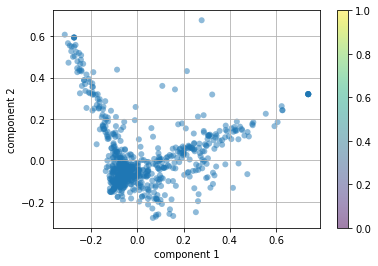

In [12]:
plt.scatter(np.array(df_pca)[:,0], np.array(df_pca)[:,1],
            edgecolor='none', alpha=0.5, cmap='tab10')

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.grid()
plt.show()

In [13]:
# 원래 데이터 점들이 가지고있던 정보량 분산을 6프로정도 표현해주고 두번쟤 컴포넌트가 약 3프로를 표현해주기 때문에
# 두개의 차원으로 차수를 줄이게 되면 원래 있던 정보량에 비해서 약 11프로 정도 보존이되는거임 
pca.explained_variance_ratio_.sum()

0.9490621369563979

In [14]:
# 9프로가아니라 95프로만큼의 정보량을 보존하고싶다, 정보를 덜 잃고 싶다 한다면 이렇게 (잃는 정보량이 5프로임 이건)
pca_temp = PCA(n_components=0.95)
X_pca = pca_temp.fit_transform(tfidf_vector_df)

# pca를 학습하면 몇개의 컴포넌트를 찾아냈는지 확인할 수있음
# 153는 212차원에 정보량을 100이라고 했을때,  95 만큼을 보존하게 하려면 153차원으로 줄이면된다 라는 뜻
pca_temp.n_components_

156

In [15]:
# 각 주성분 마다 고윳값이 0.7이상인 주성분들, 
# 누적기여율이 80% 이상이 넘어거지는 지점까지의 주성분들을 기준으로 하여 적절한 주성분 개수를 설정한다. 

result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
             '기여율':pca.explained_variance_ratio_},
            index=np.array([f"pca{num+1}" for num in range(df_pca.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pca1,0.025179,0.034078,0.034078
pca2,0.019579,0.026499,0.060577
pca3,0.016527,0.022368,0.082945
pca4,0.015722,0.021278,0.104223
pca5,0.014630,0.019800,0.124023
...,...,...,...
pca151,0.001229,0.001663,0.942813
pca152,0.001188,0.001608,0.944421
pca153,0.001173,0.001587,0.946008
pca154,0.001131,0.001531,0.947539


In [16]:
df_pca

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca146,pca147,pca148,pca149,pca150,pca151,pca152,pca153,pca154,pca155
project_name,,,,,,,,,,,,,,,,,,,,,
freeCodeCamp/freeCodeCamp,0.200958,0.031129,0.089167,0.093599,-0.076463,-0.025827,-0.080545,0.073742,-0.056504,-0.065330,...,-0.026298,-0.005072,-0.003206,0.002115,0.016974,-0.012733,0.013209,-0.027818,-0.041824,-0.000799
996icu/996.ICU,-0.046221,-0.038014,-0.031104,-0.033124,-0.002902,-0.004743,-0.002066,-0.017500,-0.005727,-0.035697,...,-0.003380,-0.002324,-0.000476,-0.001218,0.000263,-0.004847,0.002353,-0.002964,0.001031,-0.001513
EbookFoundation/free-programming-books,-0.032949,-0.043777,-0.115603,0.281728,-0.197701,0.028314,0.117805,0.024109,0.155292,0.067611,...,0.061308,0.018353,-0.008862,0.060219,-0.003523,0.041055,-0.009489,-0.037726,0.105877,0.022433
jwasham/coding-interview-university,-0.054011,0.050652,0.085514,-0.089270,-0.076913,0.115290,0.218215,0.234993,-0.414245,0.192101,...,-0.000688,-0.020497,-0.029712,0.006766,-0.011172,-0.003837,-0.025136,-0.000792,-0.007933,-0.003777
vuejs/vue,0.333167,0.056013,0.008019,-0.105656,0.096107,-0.008896,0.085938,-0.039476,0.043198,0.115456,...,-0.026918,0.030288,-0.033800,-0.031225,0.001559,-0.021907,-0.006752,-0.023601,0.006246,-0.036785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
visionmedia/superagent,-0.046221,-0.038014,-0.031104,-0.033124,-0.002902,-0.004743,-0.002066,-0.017500,-0.005727,-0.035697,...,-0.003380,-0.002324,-0.000476,-0.001218,0.000263,-0.004847,0.002353,-0.002964,0.001031,-0.001513
charlax/professional-programming,-0.099201,0.068362,0.041702,-0.077475,-0.145089,0.017839,0.003241,0.102289,-0.097059,0.095550,...,-0.000827,0.038842,-0.002041,-0.042970,-0.005125,-0.011664,0.004276,0.015305,-0.024047,-0.018124
oracle/graal,0.107569,0.360082,-0.002621,0.093365,0.225647,0.121583,0.149979,0.265049,-0.017937,-0.018089,...,0.003993,0.012265,0.000033,-0.008543,-0.005584,0.000123,-0.005357,-0.002142,0.008194,0.011232


## DBSCAN
https://hoonzi-text.tistory.com/19

https://bcho.tistory.com/1205

In [17]:
model = DBSCAN(eps=0.4, min_samples=5, metric='cosine') # parameter 값 재설정 필요

result = model.fit_predict(df_pca)
set(result)

{-1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23}

In [18]:
# -1은 Noise 데이터를 의미 : 핵심 데이터도 아니며, 외곽 데이터도 아닌 데이터들
# 0은 외곽 데이터를 의미 : 핵심 데이터는 아니지만, 어떠한 데이터의 이웃 데이터들

df_result = df.copy()
df_result['result'] = result
a = 0
for i in df_result['result']:
    if i == -1:
        a = a + 1
print(a) # 노이즈 데이터의 개수

b = 0
for i in df_result['result']:
    if i == 0:
        b = b + 1
print(b) # 외곽 데이터의 개수

273
244


In [19]:
j = 0
keyword = []
topic = []
num = []

for cluster_num in set(result):
    
    if(cluster_num == -1 or cluster_num == 0):
        continue # 노이즈 데이터들은 버림
    else:
        print('cluster num : {}'.format(cluster_num))
        temp_df = df_result[df_result['result'] == cluster_num]       
        
        i = 0
        
        for k in temp_df['topic_keyword_str']:
            keyword.append(k)
            num.append(cluster_num)
            i = i + 1
        print('군집 내 데이터 개수: ',i)
        
        for t in temp_df['project_name']:
            topic.append(t)
    j += i
    #print(j)
    print()
dic_cluster = {}
dic_cluster['topic'] = topic
dic_cluster['keyword'] = keyword
dic_cluster['number'] = num

cluster num : 1
군집 내 데이터 개수:  213

cluster num : 2
군집 내 데이터 개수:  47

cluster num : 3
군집 내 데이터 개수:  31

cluster num : 4
군집 내 데이터 개수:  34

cluster num : 5
군집 내 데이터 개수:  9

cluster num : 6
군집 내 데이터 개수:  9

cluster num : 7
군집 내 데이터 개수:  14

cluster num : 8
군집 내 데이터 개수:  6

cluster num : 9
군집 내 데이터 개수:  9

cluster num : 10
군집 내 데이터 개수:  9

cluster num : 11
군집 내 데이터 개수:  17

cluster num : 12
군집 내 데이터 개수:  8

cluster num : 13
군집 내 데이터 개수:  8

cluster num : 14
군집 내 데이터 개수:  7

cluster num : 15
군집 내 데이터 개수:  6

cluster num : 16
군집 내 데이터 개수:  9

cluster num : 17
군집 내 데이터 개수:  6

cluster num : 18
군집 내 데이터 개수:  11

cluster num : 19
군집 내 데이터 개수:  8

cluster num : 20
군집 내 데이터 개수:  4

cluster num : 21
군집 내 데이터 개수:  5

cluster num : 22
군집 내 데이터 개수:  9

cluster num : 23
군집 내 데이터 개수:  4



In [20]:
dic_cluster

{'topic': ['jwasham/coding-interview-university',
  'sindresorhus/awesome',
  'twbs/bootstrap',
  'donnemartin/system-design-primer',
  'github/gitignore',
  'trekhleb/javascript-algorithms',
  'TheAlgorithms/Python',
  'vinta/awesome-python',
  'labuladong/fucking-algorithm',
  'ossu/computer-science',
  'golang/go',
  'axios/axios',
  'nodejs/node',
  'angular/angular',
  'mrdoob/three.js',
  'animate-css/animate.css',
  'avelino/awesome-go',
  'MisterBooo/LeetCodeAnimation',
  'awesome-selfhosted/awesome-selfhosted',
  'pallets/flask',
  'yangshun/tech-interview-handbook',
  'atom/atom',
  'thedaviddias/Front-End-Checklist',
  'chartjs/Chart.js',
  'expressjs/express',
  'kdn251/interviews',
  'Genymobile/scrcpy',
  'h5bp/html5-boilerplate',
  'nvm-sh/nvm',
  'h5bp/Front-end-Developer-Interview-Questions',
  'ansible/ansible',
  'rails/rails',
  'papers-we-love/papers-we-love',
  'fatedier/frp',
  'scikit-learn/scikit-learn',
  '521xueweihan/HelloGitHub',
  'tailwindlabs/tailwindcss

In [21]:
df_cluster = pd.DataFrame(dic_cluster)
df_cluster

,topic,keyword,number
0,jwasham/coding-interview-university,computer-science algorithm algorithm interview...,1
1,sindresorhus/awesome,lists awesome unicorns resources awesome,1
2,twbs/bootstrap,javascript css html sass bootstrap scss css,1
3,donnemartin/system-design-primer,python design development programming web syst...,1
4,github/gitignore,git git,1
...,...,...,...
478,taosdata/TDengine,iot data monitoring time-series bigdata full-s...,22
479,flutter/flutter,android windows macos dart ios mobile web mate...,23
480,fastlane/fastlane,ruby android ios screenshots automation mobile...,23
481,nolimits4web/swiper,gallery mobile slider touch carousel swipe tou...,23


In [54]:
clusters = {}
keywords = {}

num = []
for i in set(df_cluster['number']):
    n = 0
    cluster = []
    keyword = []
    for j in df_cluster.values:
        if j[2] == i:
            cluster.append(j[0])
            clusters[i] = cluster
            keyword += j[1].split(' ')
            n += 1
            
            
#             print(keyword)
        else:
            pass
        
        keywords[i] = keyword
    num.append(n)

# print(num)
count_items = []


for i in keywords.values():
    count = {}
    for j in i:
        try:
            count[j] += 1
        except:
            count[j] = 1
    val = sorted(count.items(), key=lambda x: x[1], reverse=True)
    count_items.append(val[:15]) 

df_cluster_ = pd.DataFrame()
df_cluster_['clusters'] = clusters.values()
# clusters.values()
df_cluster_['cluster_num'] = clusters.keys()
df_cluster_['count'] = num
df_cluster_['top_15_topics'] = count_items
df_cluster_

,clusters,cluster_num,count,top_15_topics
0,"[jwasham/coding-interview-university, sindreso...",1,213,"[(javascript, 71), (interview, 54), (awesome, ..."
1,"[tensorflow/tensorflow, elastic/elasticsearch,...",2,47,"[(machinelearning, 45), (deep-learning, 40), (..."
2,"[public-apis/public-apis, scrapy/scrapy, strap...",3,31,"[(api, 33), (wechat, 14), (security, 10), (res..."
3,"[ant-design/ant-design, mui-org/material-ui, P...",4,34,"[(react, 47), (vue, 42), (ui, 20), (javascript..."
4,"[laravel/laravel, symfony/symfony, ziadoz/awes...",5,9,"[(php, 22), (framework, 3), (laravel, 2), (hac..."
5,"[moby/moby, wagoodman/dive, mastodon/mastodon,...",6,9,"[(docker, 27), (containers, 2), (orchestration..."
6,"[spring-projects/spring-boot, macrozheng/mall,...",7,14,"[(spring, 54), (java, 6), (distributed, 5), (m..."
7,"[bitcoin/bitcoin, fffaraz/awesome-cpp, obsproj...",8,6,"[(c-plus-plus, 6), (cpp, 4), (crypto, 2), (c, ..."
8,"[reduxjs/redux, react-boilerplate/react-boiler...",9,9,"[(redux, 9), (react, 5), (redux-saga, 3), (web..."
9,"[chrislgarry/Apollo-11, florinpop17/app-ideas,...",10,9,"[(hacktoberfest, 8), (programming, 2), (apollo..."


### 시각화
https://m.blog.naver.com/samsjang/221023672149

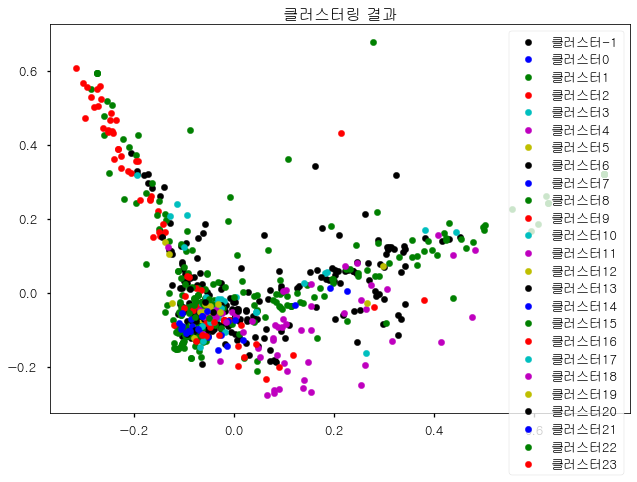

In [23]:
style.use('seaborn-talk')
krfont = {'family':'NanumGothic', 'weight':'bold', 'size':10}
matplotlib.rc('font', **krfont)
matplotlib.rcParams['axes.unicode_minus'] == False
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

X = df_pca
y = result
c = ['b','g','r','c','m','y','k']
for i in range(-1, sorted(result)[-1]+1):
    plt.scatter(X[y==i]['pca1'], X[y==i]['pca2'] , c=c[i%7], s=40, label='클러스터{}'.format(i))
plt.title('클러스터링 결과')
plt.legend()
plt.show()

## cluster_num = 1인 데이터들 대상으로 한번 더 차원 축소 후 클러스터링 진행

In [24]:
tfidf_vector_df

,admin,algorithm,analytics,android,angular,animation,ansi,api,app,architecture,...,vision,vpn,vue,web,wechat,windows,workflow,xcode,zerossl,zsh
project_name,,,,,,,,,,,,,,,,,,,,,
freeCodeCamp/freeCodeCamp,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996icu/996.ICU,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EbookFoundation/free-programming-books,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
jwasham/coding-interview-university,0.0,0.346459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
vuejs/vue,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.51531,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
visionmedia/superagent,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
charlax/professional-programming,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.400365,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
oracle/graal,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# df_pca2 = pd.DataFrame()
num_list = []
for idx, num in enumerate(result):
    if num == 1:
        num_list.append(df_pca.iloc[idx])
    df_result2 = df_result[df_result['result'] == 1]
df_pca2 = pd.DataFrame(num_list)
df_pca2 = df_pca2.loc[~df_pca2.index.duplicated(keep='first')]
df_pca2

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca146,pca147,pca148,pca149,pca150,pca151,pca152,pca153,pca154,pca155
jwasham/coding-interview-university,-0.054011,0.050652,0.085514,-0.089270,-0.076913,0.115290,0.218215,0.234993,-0.414245,0.192101,...,-0.000688,-0.020497,-0.029712,0.006766,-0.011172,-0.003837,-0.025136,-0.000792,-0.007933,-0.003777
sindresorhus/awesome,-0.099530,-0.092057,0.074880,-0.043877,-0.272170,0.472313,-0.190223,0.170066,0.059228,0.171555,...,0.017922,0.047681,0.002022,0.044772,-0.124542,0.013387,-0.037359,0.045629,-0.016052,0.097057
twbs/bootstrap,0.289685,0.043888,-0.003813,-0.299858,-0.143785,0.143697,0.446822,-0.254506,0.099008,-0.003793,...,-0.012593,0.035224,0.042525,0.014626,0.013499,-0.012032,-0.009828,0.053204,-0.052687,0.034076
donnemartin/system-design-primer,0.005995,0.101745,0.087593,-0.017320,0.213779,0.119049,0.075164,0.017452,-0.188238,0.382830,...,0.026766,0.007867,0.072856,0.009684,-0.000370,-0.012766,0.003826,0.012804,-0.024374,0.027425
github/gitignore,-0.083966,-0.104549,-0.112660,0.045462,-0.074492,0.084140,-0.072211,-0.096293,-0.064006,0.214103,...,-0.031104,0.003743,0.030354,0.011091,-0.026764,-0.016925,-0.013898,-0.003157,-0.025317,-0.021742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
reddit-archive/reddit,0.278101,0.677379,0.047945,0.163593,0.274600,0.305160,0.065639,0.070550,-0.015913,-0.092091,...,-0.000090,-0.008650,0.023035,0.009102,-0.012157,-0.003703,0.011103,-0.013299,0.015330,0.012434
rough-stuff/rough,0.040580,-0.008219,-0.062335,-0.115874,-0.017290,0.016619,0.073907,-0.073625,0.022291,-0.001452,...,-0.044296,-0.019571,-0.031101,-0.036706,0.014413,-0.016374,-0.025202,0.079012,0.000952,-0.030008
charlax/professional-programming,-0.099201,0.068362,0.041702,-0.077475,-0.145089,0.017839,0.003241,0.102289,-0.097059,0.095550,...,-0.000827,0.038842,-0.002041,-0.042970,-0.005125,-0.011664,0.004276,0.015305,-0.024047,-0.018124
oracle/graal,0.107569,0.360082,-0.002621,0.093365,0.225647,0.121583,0.149979,0.265049,-0.017937,-0.018089,...,0.003993,0.012265,0.000033,-0.008543,-0.005584,0.000123,-0.005357,-0.002142,0.008194,0.011232


In [26]:
# tfidf_vector_df[tfidf_vector_df.index==df_pca2.index]

tfidf_vector_df2 = pd.merge(tfidf_vector_df, df_pca2, left_index=True, right_index=True, how='inner', sort=False)

tfidf_vector_df2.drop(tfidf_vector_df2.iloc[:,217:], axis=1, inplace=True)
tfidf_vector_df2.loc[~tfidf_vector_df2.index.duplicated(keep='first')]
tfidf_vector_df2

,admin,algorithm,analytics,android,angular,animation,ansi,api,app,architecture,...,vision,vpn,vue,web,wechat,windows,workflow,xcode,zerossl,zsh
521xueweihan/HelloGitHub,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
Advanced-Frontend/Daily-Interview-Question,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.48997,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
AllThingsSmitty/css-protips,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
BoostIO/Boostnote,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.000000,0.0,0.457462,0.0,0.0,0.0,0.0
ClickHouse/ClickHouse,0.0,0.000000,0.478766,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yangshun/front-end-interview-handbook,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.167952,0.0,0.000000,0.0,0.0,0.0,0.0
yangshun/tech-interview-handbook,0.0,0.453339,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
yewstack/yew,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.745944,0.0,0.000000,0.0,0.0,0.0,0.0
zenorocha/clipboard.js,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0


In [27]:
ca = PCA(n_components=155)
df_pca2 = pca.fit_transform(tfidf_vector_df2)
df_pca2 = pd.DataFrame(df_pca2, index=tfidf_vector_df2.index,
                      columns=[f"pca{num+1}" for num in range(df_pca2.shape[1])])

df_pca2

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca146,pca147,pca148,pca149,pca150,pca151,pca152,pca153,pca154,pca155
521xueweihan/HelloGitHub,-0.375398,-0.026385,-0.268832,-0.459483,-0.347415,-0.086387,-0.342752,-0.267010,0.165610,0.095012,...,8.662806e-18,-6.343417e-18,7.537440e-18,-6.746186e-18,5.679058e-18,-4.587672e-18,-3.944257e-18,3.454486e-18,-4.628672e-18,7.483324e-18
Advanced-Frontend/Daily-Interview-Question,0.317678,0.275000,0.288733,-0.017159,0.024159,0.271534,-0.148725,-0.072504,0.059320,-0.099027,...,-6.569316e-18,8.151251e-18,4.907018e-18,-1.410865e-17,1.047054e-18,-1.090958e-17,-8.171624e-18,1.582503e-17,-2.655116e-18,4.099085e-18
AllThingsSmitty/css-protips,0.064039,0.573679,0.229900,-0.354950,0.125000,-0.234826,0.141402,-0.066848,0.104522,-0.115580,...,1.822796e-18,1.981165e-18,-1.375828e-20,-1.912477e-18,-7.011615e-19,-2.361829e-18,1.330002e-18,2.710910e-18,6.555548e-18,-2.517652e-18
BoostIO/Boostnote,-0.028547,-0.006905,-0.085208,-0.028301,0.111670,-0.029666,0.077090,0.070989,0.162542,-0.065740,...,-2.412492e-17,-3.652775e-17,-1.616830e-17,1.043078e-17,1.520459e-17,1.018107e-17,4.828777e-18,-1.041799e-17,5.537470e-17,-4.709213e-18
ClickHouse/ClickHouse,-0.123418,-0.110122,0.020369,0.157539,-0.055012,0.106240,0.459831,-0.291265,0.058003,0.065052,...,3.149688e-18,1.178070e-17,4.178030e-19,-1.707481e-17,7.221008e-18,-5.490928e-19,-4.624574e-18,4.900388e-18,1.263375e-17,-1.100135e-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yangshun/front-end-interview-handbook,0.370704,0.364956,0.330722,-0.044387,-0.022513,0.242644,-0.111369,0.055588,-0.054886,0.244157,...,-5.719243e-17,-2.078481e-17,1.965399e-17,-4.147860e-17,4.723603e-17,-1.390688e-17,6.043526e-18,4.218645e-18,3.180516e-18,-2.763933e-17
yangshun/tech-interview-handbook,-0.089822,0.037286,0.290637,0.054000,0.254344,0.714207,-0.292538,0.029361,0.087381,-0.007307,...,1.060789e-17,-1.773440e-17,-4.032624e-18,-4.544496e-17,-3.166076e-17,-2.092070e-17,1.153422e-17,3.606241e-17,3.076663e-17,-9.730419e-18
yewstack/yew,-0.019726,-0.026250,-0.041926,0.024186,-0.046918,0.015944,0.055666,0.359870,-0.090725,0.537738,...,1.822796e-18,1.981165e-18,-1.375828e-20,-1.912477e-18,-7.011615e-19,-2.361829e-18,1.330002e-18,2.710910e-18,6.555548e-18,-2.517652e-18
zenorocha/clipboard.js,0.692897,-0.270314,-0.069077,0.008419,-0.026230,-0.047627,-0.202221,-0.271151,-0.353861,-0.080630,...,2.411076e-17,-1.115240e-17,3.859871e-17,-2.968046e-17,1.742415e-17,-4.062294e-17,-2.273557e-17,5.498317e-18,-1.787810e-17,1.871100e-17


In [28]:
model2 = DBSCAN(eps=0.3, min_samples=5, metric='cosine') # parameter 값 재설정 필요

result2 = model2.fit_predict(df_pca2)
set(result2)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

In [29]:
df_result2['result2'] = result2

a = 0
for i in df_result2['result2']:
    if i == -1:
        a = a + 1
print(a) # 노이즈 데이터의 개수

b = 0
for i in df_result2['result2']:
    if i == 0:
        b = b + 1
print(b) # 외곽 데이터의 개수

116
10


<ipython-input-29-2b9ff483fef0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result2['result2'] = result2


In [30]:
j = 0
keyword = []
topic = []
num = []

for cluster_num in set(result2):
    
    if(cluster_num == -1 or cluster_num == 0):
        continue # 노이즈 데이터들은 버림
    else:
        print('cluster num : {}'.format(cluster_num))
        temp_df2 = df_result2[df_result2['result2'] == cluster_num]       
        
        i = 0
        
        for k in temp_df2['topic_keyword_str']:
            keyword.append(k)
            num.append(cluster_num)
            i = i + 1
        print('군집 내 데이터 개수: ',i)
        
        for t in temp_df2['project_name']:
            topic.append(t)
            
    j += i
    #print(j)
    print()

dic_cluster2 = {}
dic_cluster2['topic'] = topic
dic_cluster2['keyword'] = keyword
dic_cluster2['number'] = num

cluster num : 1
군집 내 데이터 개수:  13

cluster num : 2
군집 내 데이터 개수:  12

cluster num : 3
군집 내 데이터 개수:  12

cluster num : 4
군집 내 데이터 개수:  8

cluster num : 5
군집 내 데이터 개수:  5

cluster num : 6
군집 내 데이터 개수:  9

cluster num : 7
군집 내 데이터 개수:  5

cluster num : 8
군집 내 데이터 개수:  6

cluster num : 9
군집 내 데이터 개수:  9

cluster num : 10
군집 내 데이터 개수:  8



In [31]:
df_cluster2 = pd.DataFrame(dic_cluster2)
df_cluster2

,topic,keyword,number
0,labuladong/fucking-algorithm,computer-science algorithm leetcode data inter...,1
1,MisterBooo/LeetCodeAnimation,leetcode animation leetcode leetcode leetcode,1
2,caddyserver/caddy,go tls http security privacy web http reverse-...,1
3,zenorocha/clipboard.js,javascript clipboard,1
4,IanLunn/Hover,css sass css,1
...,...,...,...
82,heartcombo/devise,ruby rails authentication devise,10
83,postcss/autoprefixer,css prefixer postcss-plugins,10
84,ehang-io/nps,go dns tunnel ssh http tcp gzip http udp firew...,10
85,PKUanonym/REKCARC-TSC-UHT,computer-science course course-project tsinghu...,10


In [56]:
clusters2 = {}
keywords2 = {}
num = []

for i in set(df_cluster2['number']):
    n = 0
    cluster = []
    keyword = []
    for j in df_cluster2.values:
        if j[2] == i:
            cluster.append(j[0])
            clusters2[i] = cluster
            keyword += j[1].split(' ')
            n += 1
#             print(keyword)
        else:
            pass
        
        keywords2[i] = keyword
    num.append(n)
# print(num)


count_items2 = []

for i in keywords2.values():
    count = {}
    for j in i:
        try:
            count[j] += 1
        except:
            count[j] = 1
    val = sorted(count.items(), key=lambda x: x[1], reverse=True)
    count_items2.append(val[:15]) 

df_cluster_2 = pd.DataFrame()
df_cluster_2['clusters'] = clusters2.values()
df_cluster_2['cluster_num'] = clusters2.keys()
df_cluster_2['count'] = num
df_cluster_2['top_15_topics'] = count_items2
df_cluster_2

,clusters,cluster_num,count,top_15_topics
0,"[labuladong/fucking-algorithm, MisterBooo/Leet...",1,13,"[(javascript, 6), (leetcode, 5), (sql, 4), (ht..."
1,"[twbs/bootstrap, nodejs/node, jaywcjlove/aweso...",2,12,"[(javascript, 6), (css, 6), (awesome, 6), (htm..."
2,"[vinta/awesome-python, mrdoob/three.js, atom/a...",3,12,"[(css, 8), (web, 6), (javascript, 5), (python,..."
3,"[animate-css/animate.css, kdn251/interviews, t...",4,8,"[(interview, 16), (awesome, 6), (algorithm, 5)..."
4,"[thedaviddias/Front-End-Checklist, psf/request...",5,5,"[(frontend, 3), (javascript, 2), (python, 2), ..."
5,"[pallets/flask, papers-we-love/papers-we-love,...",6,9,"[(awesome, 4), (javascript, 4), (python, 3), (..."
6,"[avelino/awesome-go, expressjs/express, scikit...",7,5,"[(awesome, 4), (go, 2), (data, 2), (golang, 1)..."
7,"[521xueweihan/HelloGitHub, PhilJay/MPAndroidCh...",8,6,"[(awesome, 3), (android, 3), (git, 2), (java, ..."
8,"[TheAlgorithms/Java, Advanced-Frontend/Daily-I...",9,9,"[(algorithm, 4), (web, 4), (interview, 3), (ja..."
9,"[traefik/traefik, pandas-dev/pandas, pure-css/...",10,8,"[(go, 2), (golang, 2), (css, 2), (http, 2), (l..."


### 시각화

https://m.blog.naver.com/samsjang/221023672149

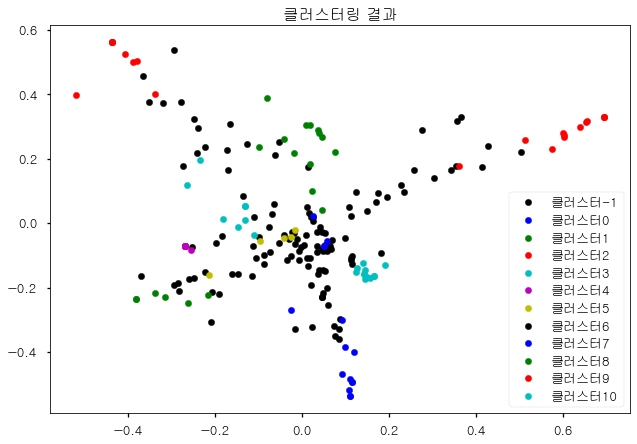

In [33]:
style.use('seaborn-talk')
krfont = {'family':'NanumGothic', 'weight':'bold', 'size':10}
matplotlib.rc('font', **krfont)
matplotlib.rcParams['axes.unicode_minus'] == False
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

X = df_pca2
y = result2
c = ['b','g','r','c','m','y','k']
for i in range(-1, sorted(result2)[-1]+1):
    # pca 2개 선택
    plt.scatter(X[y==i]['pca2'], X[y==i]['pca3'] , c=c[i%7], s=40, label='클러스터{}'.format(i))
plt.title('클러스터링 결과')
plt.legend()
plt.show()

In [34]:
# 177개 pca 다시

## cluster_num = 1인 데이터들 대상으로 차원축소 하지 않고 클러스터링 진행

In [35]:
# df_pca2 = pd.DataFrame()
num_list = []
for idx, num in enumerate(result):
    if num == 1:
        num_list.append(df_pca.iloc[idx])
    df_result2_ = df_result[df_result['result'] == 1]
df_pca2_ = pd.DataFrame(num_list)
# df_pca2_ = df_pca2_.loc[~df_pca2_.index.duplicated(keep='first')]
df_pca2_

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca146,pca147,pca148,pca149,pca150,pca151,pca152,pca153,pca154,pca155
jwasham/coding-interview-university,-0.054011,0.050652,0.085514,-0.089270,-0.076913,0.115290,0.218215,0.234993,-0.414245,0.192101,...,-0.000688,-0.020497,-0.029712,0.006766,-0.011172,-0.003837,-0.025136,-0.000792,-0.007933,-0.003777
sindresorhus/awesome,-0.099530,-0.092057,0.074880,-0.043877,-0.272170,0.472313,-0.190223,0.170066,0.059228,0.171555,...,0.017922,0.047681,0.002022,0.044772,-0.124542,0.013387,-0.037359,0.045629,-0.016052,0.097057
twbs/bootstrap,0.289685,0.043888,-0.003813,-0.299858,-0.143785,0.143697,0.446822,-0.254506,0.099008,-0.003793,...,-0.012593,0.035224,0.042525,0.014626,0.013499,-0.012032,-0.009828,0.053204,-0.052687,0.034076
donnemartin/system-design-primer,0.005995,0.101745,0.087593,-0.017320,0.213779,0.119049,0.075164,0.017452,-0.188238,0.382830,...,0.026766,0.007867,0.072856,0.009684,-0.000370,-0.012766,0.003826,0.012804,-0.024374,0.027425
github/gitignore,-0.083966,-0.104549,-0.112660,0.045462,-0.074492,0.084140,-0.072211,-0.096293,-0.064006,0.214103,...,-0.031104,0.003743,0.030354,0.011091,-0.026764,-0.016925,-0.013898,-0.003157,-0.025317,-0.021742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
reddit-archive/reddit,0.278101,0.677379,0.047945,0.163593,0.274600,0.305160,0.065639,0.070550,-0.015913,-0.092091,...,-0.000090,-0.008650,0.023035,0.009102,-0.012157,-0.003703,0.011103,-0.013299,0.015330,0.012434
rough-stuff/rough,0.040580,-0.008219,-0.062335,-0.115874,-0.017290,0.016619,0.073907,-0.073625,0.022291,-0.001452,...,-0.044296,-0.019571,-0.031101,-0.036706,0.014413,-0.016374,-0.025202,0.079012,0.000952,-0.030008
charlax/professional-programming,-0.099201,0.068362,0.041702,-0.077475,-0.145089,0.017839,0.003241,0.102289,-0.097059,0.095550,...,-0.000827,0.038842,-0.002041,-0.042970,-0.005125,-0.011664,0.004276,0.015305,-0.024047,-0.018124
oracle/graal,0.107569,0.360082,-0.002621,0.093365,0.225647,0.121583,0.149979,0.265049,-0.017937,-0.018089,...,0.003993,0.012265,0.000033,-0.008543,-0.005584,0.000123,-0.005357,-0.002142,0.008194,0.011232


In [36]:
model2_ = DBSCAN(eps=0.3, min_samples=5, metric='cosine') # parameter 값 재설정 필요

result2_ = model2_.fit_predict(df_pca2_)
set(result2_)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}

In [37]:
df_result2_['result2'] = result2_

a = 0
for i in df_result2_['result2']:
    if i == -1:
        a = a + 1
print(a) # 노이즈 데이터의 개수

b = 0
for i in df_result2_['result2']:
    if i == 0:
        b = b + 1
print(b) # 외곽 데이터의 개수

91
13


<ipython-input-37-6210960957ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result2_['result2'] = result2_


In [38]:
j = 0
keyword = []
topic = []
num = []

for cluster_num in set(result2_):
    
    if(cluster_num == -1 or cluster_num == 0):
        continue # 노이즈 데이터들은 버림
    else:
        print('cluster num : {}'.format(cluster_num))
        temp_df2_ = df_result2_[df_result2_['result2'] == cluster_num]       
        
        i = 0
        
        for k in temp_df2_['topic_keyword_str']:
            keyword.append(k)
            num.append(cluster_num)
            i = i + 1
        print('군집 내 데이터 개수: ',i)
        
        for t in temp_df2_['project_name']:
            topic.append(t)
            
    j += i
    #print(j)
    print()

dic_cluster2_ = {}
dic_cluster2_['topic'] = topic
dic_cluster2_['keyword'] = keyword
dic_cluster2_['number'] = num

cluster num : 1
군집 내 데이터 개수:  17

cluster num : 2
군집 내 데이터 개수:  10

cluster num : 3
군집 내 데이터 개수:  10

cluster num : 4
군집 내 데이터 개수:  7

cluster num : 5
군집 내 데이터 개수:  5

cluster num : 6
군집 내 데이터 개수:  15

cluster num : 7
군집 내 데이터 개수:  9

cluster num : 8
군집 내 데이터 개수:  9

cluster num : 9
군집 내 데이터 개수:  5

cluster num : 10
군집 내 데이터 개수:  10

cluster num : 11
군집 내 데이터 개수:  12



In [39]:
df_cluster2_ = pd.DataFrame(dic_cluster2_)
df_cluster2_

,topic,keyword,number
0,twbs/bootstrap,javascript css html sass bootstrap scss css,1
1,animate-css/animate.css,css style animation css,1
2,thedaviddias/Front-End-Checklist,javascript css html lists checklist web fronte...,1
3,h5bp/html5-boilerplate,javascript css html html best-practices robust...,1
4,h5bp/Front-end-Developer-Interview-Questions,frontend interview css html javascript test,1
...,...,...,...
104,google/zx,nodejs javascript,11
105,validatorjs/validator.js,javascript sanitization nodejs validation inpu...,11
106,eggjs/egg,nodejs enterprise koa framework koa koa nodejs...,11
107,coreybutler/nvm-windows,nodejs go windows nodejs management nvm versio...,11


In [58]:
clusters2_ = {}
keywords2_ = {}
num = []

for i in set(df_cluster2_['number']):
    n = 0
    cluster = []
    keyword = []
    for j in df_cluster2_.values:
        if j[2] == i:
            cluster.append(j[0])
            clusters2_[i] = cluster
            keyword += j[1].split(' ')
            n += 1
#             print(keyword)
        else:
            pass
        
        keywords2_[i] = keyword
    num.append(n)
# print(num)

count_items2_ = []

for i in keywords2_.values():
    count = {}
    for j in i:
        try:
            count[j] += 1
        except:
            count[j] = 1
    val = sorted(count.items(), key=lambda x: x[1], reverse=True)
    count_items2_.append(val[:15]) 

df_cluster_2_ = pd.DataFrame()
df_cluster_2_['clusters'] = clusters2_.values()
# clusters.values()
df_cluster_2_['cluster_num'] = clusters2_.keys()
df_cluster_2_['count'] = num
df_cluster_2_['top_15_topics'] = count_items2_
df_cluster_2_

,clusters,cluster_num,count,top_15_topics
0,"[twbs/bootstrap, animate-css/animate.css, thed...",1,17,"[(css, 29), (html, 11), (javascript, 8), (fron..."
1,"[github/gitignore, 521xueweihan/HelloGitHub, g...",2,10,"[(git, 21), (go, 4), (golang, 4), (awesome, 3)..."
2,"[vinta/awesome-python, willmcgugan/rich, jobbo...",3,10,"[(python, 19), (queue, 4), (task, 3), (awesome..."
3,"[angular/angular, mrdoob/three.js, nwjs/nw.js,...",4,7,"[(web, 19), (javascript, 5), (nodejs, 3), (htm..."
4,"[ReactiveX/RxJava, google/guava, crossoverJie/...",5,5,"[(java, 4), (flow, 1), (rxjava, 1), (react, 1)..."
5,"[Genymobile/scrcpy, square/okhttp, android/arc...",6,15,"[(android, 20), (kotlin, 8), (java, 5), (anima..."
6,"[sindresorhus/awesome, awesome-selfhosted/awes...",7,9,"[(awesome, 18), (list, 5), (nodejs, 2), (lists..."
7,"[Leaflet/Leaflet, zenorocha/clipboard.js, Reac...",8,9,"[(javascript, 11), (maps, 1), (leaflet, 1), (c..."
8,"[atom/atom, GitSquared/edex-ui, nativefier/nat...",9,5,"[(electron, 5), (windows, 5), (macos, 5), (lin..."
9,"[pingcap/tidb, metabase/metabase, metabase/met...",10,10,"[(sql, 30), (data, 12), (vision, 5), (business..."


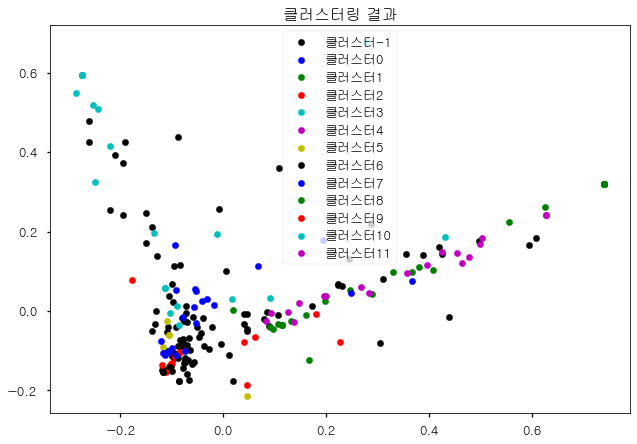

In [41]:
style.use('seaborn-talk')
krfont = {'family':'NanumGothic', 'weight':'bold', 'size':10}
matplotlib.rc('font', **krfont)
matplotlib.rcParams['axes.unicode_minus'] == False
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

X = df_pca2_
y = result2_
c = ['b','g','r','c','m','y','k']
for i in range(-1, sorted(result2_)[-1]+1):
    # pca 2개 선택
    plt.scatter(X[y==i]['pca1'], X[y==i]['pca2'] , c=c[i%7], s=40, label='클러스터{}'.format(i))
plt.title('클러스터링 결과')
plt.legend()
plt.show()

In [42]:
# df_cluster.to_excel('first_cluster.xlsx')
# # 첫번째 DBSCAN 클러스터링 결과

# df_cluster2.to_excel('second_cluster_pca.xlsx')
# # 첫번째 결과에서 cluster_num=1인 데이터들을 다시 기존 데이터에서 차원축소 한 후 클러스터링

# df_cluster2_.to_excel('second_cluster_not_pca.xlsx')
# # 첫번째 결과에서 cluster_num=1인 데이터들을 차원축소 하지 않고 클러스터링

In [59]:
df_cluster_.to_excel('first_clustering.xlsx')
# 첫번째 DBSCAN 클러스터링 결과

df_cluster_2.to_excel('second_clustering(차원축소).xlsx')
# 첫번째 결과에서 cluster_num=1인 데이터들을 다시 기존 데이터에서 차원축소 한 후 클러스터링

df_cluster_2_.to_excel('second_clustering(차원축소x).xlsx')
# 첫번째 결과에서 cluster_num=1인 데이터들을 차원축소 하지 않고 클러스터링